# Image Classification with FastAI2

Notebook based on

* https://github.com/fastai/fastbook/blob/master/02_production.ipynb

* https://github.com/fastai/fastbook/blob/master/05_pet_breeds.ipynb

* https://github.com/fastai/fastbook/blob/master/18_CAM.ipynb

In [1]:
# Make sure to go to Runtime -> Change runtime type -> GPU
# when training models

In [2]:
## installs fastai v2 (Google Colab comes with fastai v1 by default)
# this will also ask permision to access your Google Drive
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 6.9 MB/s 
     |████████████████████████████████| 1.2 MB 51.4 MB/s 
     |████████████████████████████████| 46 kB 5.5 MB/s 
     |████████████████████████████████| 189 kB 74.1 MB/s 
     |████████████████████████████████| 56 kB 6.3 MB/s 
     |████████████████████████████████| 51 kB 392 kB/s 
Mounted at /content/gdrive


In [3]:
# the variable gdrive now contains you Google Drive path
# this is a pathlib Path object
# we can create new file paths from it using the '/' operator
# See: https://realpython.com/python-pathlib/
from fastbook import *
gdrive

Path('/content/gdrive/My Drive')

In [4]:
# we can check this Path using os.listdir()
import os
os.listdir(gdrive)[0:5]

['Currículum Vitae - Antonio Rueda Toicen (Eng. ver).pdf',
 'CIM_111.pdf',
 '195463.pdf',
 'Fractal Geography 1 Andr_ Dauphin.pdf',
 'Analysis of Biological Networks (Wiley Series in Bioinformatics) (1).pdf']

In [5]:
# fastai comes with a curated list of datasets
# See: https://docs.fast.ai/data.external.html
dir(URLs)[:10]

['ADULT_SAMPLE',
 'AG_NEWS',
 'AMAZON_REVIEWS',
 'AMAZON_REVIEWS_POLARITY',
 'BIWI_HEAD_POSE',
 'BIWI_SAMPLE',
 'CALTECH_101',
 'CAMVID',
 'CAMVID_TINY',
 'CARS']

In [6]:
# URLs.PETS links to a dataset of dog and cat images compiled 
# by Oxford's Visual Geometry Group
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [7]:
from fastai.vision.all import *

# Use gdrive and the dest argument to save the uncompressed data  
# in a folder named 'pets_images' 
# see: https://github.com/fastai/fastai/blob/89770a495b500f585210845e195c5c9a7996f2f4/fastai/data/external.py#L244

# See: https://www.geeksforgeeks.org/python-os-path-exists-method/
if not (gdrive / 'pets_images').is_dir():
  # https://www.geeksforgeeks.org/python-os-mkdir-method/
  os.mkdir(gdrive / 'pets_images')
  # this will download the data, decompress it, and return the path where the uncompressed folder is

  # see: https://github.com/fastai/fastai/blob/89770a495b500f585210845e195c5c9a7996f2f4/fastai/data/external.py#L244

  path = untar_data(URLs.PETS, dest = (gdrive / 'pets_images'))



In [8]:
path = Path('/content/gdrive/My Drive/pets_images/oxford-iiit-pet')

In [9]:
# what we have downloaded
os.listdir(path)

['images', 'annotations', 'pet_image_embeddings.pkl']

In [10]:
# We take a look at the images
len(os.listdir(path / 'images')), os.listdir(path / 'images')[:10]

(7393,
 ['pomeranian_92.jpg',
  'english_setter_198.jpg',
  'saint_bernard_14.jpg',
  'Persian_126.jpg',
  'saint_bernard_63.jpg',
  'Persian_162.jpg',
  'scottish_terrier_16.jpg',
  'Persian_191.jpg',
  'great_pyrenees_45.jpg',
  'leonberger_34.jpg'])

pomeranian_92.jpg


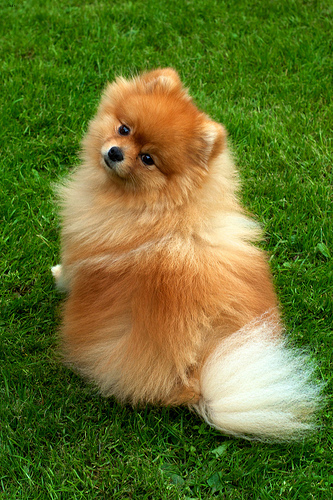

In [11]:
# viewing a single image
from PIL import Image
# change the index to change the image 
index = 0
image_filenames = os.listdir(path / 'images')
print(image_filenames[index])
img_pil = Image.open(path /'images'/ image_filenames[index])
img_pil

In [12]:
path /'images'/ image_filenames[index]

Path('/content/gdrive/My Drive/pets_images/oxford-iiit-pet/images/pomeranian_92.jpg')

In [13]:
# turning the image into a tensor
# https://github.com/fastai/fastai/blob/66a03da8a11cd85188f4c6f063b98c4a209492e8/fastai/vision/core.py#L91
img_as_tensor = image2tensor(load_image(path /'images'/ image_filenames[index]))
img_as_tensor

tensor([[[ 63,  52,  51,  ...,  62,  68,  73],
         [ 44,  42,  52,  ...,  67,  62,  70],
         [ 49,  52,  64,  ...,  68,  61,  74],
         ...,
         [ 59,  60,  24,  ...,  19,  54,  14],
         [ 51,  73,  75,  ...,  44,  61,   7],
         [ 41,  60, 101,  ...,  55,  44,   1]],

        [[125, 114, 113,  ..., 113, 118, 124],
         [109, 103, 108,  ..., 114, 108, 116],
         [116, 110, 117,  ..., 113, 106, 121],
         ...,
         [112,  98,  57,  ...,  55,  94,  71],
         [107, 133, 139,  ...,  84, 113,  65],
         [ 89, 117, 172,  ..., 101, 108,  56]],

        [[ 16,   7,   4,  ...,  10,  19,  19],
         [  7,   0,   1,  ...,  10,  10,  17],
         [ 13,   8,  11,  ...,  10,   5,  17],
         ...,
         [  6,  13,  12,  ...,   0,  23,   2],
         [  0,  20,  29,  ...,  13,  30,   4],
         [  5,   2,  42,  ...,  13,  11,   0]]], dtype=torch.uint8)

In [14]:
# let's check the annotations file, out of curiosity 
os.listdir(path / 'annotations')[:10]

['trainval.txt', 'test.txt', 'xmls']

In [15]:
#the space in 'My Drive' gives us some pain when train to use the path variable through bash 
!ls {path}

ls: cannot access '/content/gdrive/My': No such file or directory
ls: cannot access 'Drive/pets_images/oxford-iiit-pet': No such file or directory


In [16]:
# we convert the path to string
# fastai's ls() method works like os.listdir() and bash's ls  
str(path.ls()[1])

'/content/gdrive/My Drive/pets_images/oxford-iiit-pet/annotations'

In [17]:
# we won't need the annotations file, as the labels of the images are already in the filenames
!cat '/content/gdrive/My Drive/pets_images/oxford-iiit-pet/annotations/test.txt' | head

Abyssinian_201 1 1 1
Abyssinian_202 1 1 1
Abyssinian_204 1 1 1
Abyssinian_205 1 1 1
Abyssinian_206 1 1 1
Abyssinian_207 1 1 1
Abyssinian_20 1 1 1
Abyssinian_210 1 1 1
Abyssinian_212 1 1 1
Abyssinian_213 1 1 1


In [18]:
image_filenames[0:3]

['pomeranian_92.jpg', 'english_setter_198.jpg', 'saint_bernard_14.jpg']

In [19]:
# let's try using label extraction using regular expression
# as shown in the notebook 
fname = (path/"images").ls()[0]
# we want to discard the file extension and the number of the pet
# we discard all characters after the _
re.findall(r'(.+)_\d+.jpg$', fname.name)[0]


'pomeranian'

In [20]:
# with str.split() we would get the same thing
# https://stackoverflow.com/a/48593823/45963
str(fname.name).split('_')[0]

'pomeranian'

In [ ]:
# count the number of images for each breed
import pandas as pd
list_of_breeds = [re.findall(r'(.+)_\d+.jpg$', fname.name) for fname in (path/"images").ls()]
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
pd.Series([item[0] for item in list_of_breeds if isinstance(item, list) and len(item) > 0])._______()


In [ ]:
# fastai's DataBlock transforms raw data into PyTorch Datasets and Dataloaders
# that are fed into the forward function of nn.Module subclasses
# 
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 # get_image_files reads the name of the image files
                 get_items=get_image_files,
                 # here we split the dataset into train and validation sets 
                 splitter=_________(seed=42),
                 #RegexLabeller uses the expression that we saw above
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 # these two lines implement fastai's 'presizing' data augmentation strategy
                 # this is resizing and augmenting the data before feeding it to the trainer 
                 # it is important to use a Resize transform to make all images in a batch able to fit
                 # into a single tensor 
                 # Tip: search for 'presizing' in the pet_breeds notebook
                 # https://github.com/fastai/fastbook/blob/master/05_pet_breeds.ipynb
                 item________(460),
                 #See: https://docs.fast.ai/vision.augment.html#aug_transforms
                 batch_tfms=________(size=224, min_scale=0.75))

pets

In [ ]:
#summary will show us how we have splitted our train and validation sets
#https://docs.fast.ai/data.block.html#Debugging 
#https://forums.fast.ai/t/datablock-summary-is-amazing-in-v2/64632 
pets.summary(path / 'images')

In [ ]:
# https://forums.fast.ai/t/solved-reproducibility-where-is-the-randomness-coming-in/31628/25
# we set up the seed defined for the training and validation split 
set_seed(42, True)
dls = pets.dataloaders(path / 'images')
dls

In [ ]:
# We inspect a batch of the labeled data
# We should *always* do this, as there is no guarantee
# that the DataBlock was created correctly
dls.________()

In [ ]:
# we can inspect how a single image from the training set is being augmented 
# see https://github.com/fastai/fastbook/blob/master/02_production.ipynb
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
# check images in the validation set
# https://github.com/fastai/fastbook/blob/master/02_production.ipynb
dls.______._______(max_n=4, nrows=1)

In [ ]:
# we get a batch of data as training tensor images and training tensor labels using one_batch()
x, y = dls.one_batch()
print(f'batch size = {len(y)}')
# labels are encoded as integers, based on alphabetical order
y

In [ ]:
# we create a convolutional netwokr trainer with cnn_learner 
# we pass it the dataloaders for traing and validation
# specify a resnet34 as the pretrained model that we will use and define 
# error_rate (1 -accuracy)
# try ctrl + click on cnn_learner to see its definition in Google Colab
# Q: which is its optimization algorithm by default? 
learn = ________(____, _______, metrics=error_rate)
learn

In [ ]:
# we can check the architecture of the PyTorch model
# Q: What is the number of out_features in the last Linear layer? Why? 
learn.model

In [ ]:
# fine_tune trains first just the head of the model (final layers)
# and then all layers as a second step
# the parameters that it receives is number of epochs that it will train all layers
# layers are using 'discriminative learning rates'
# final layers will get higher learning rates than initial layers 
# use ctrl + click to read the the definition of fine_tune in schedule.py
learn.______(2)

In [ ]:
# here show a graph of the validation and training losses
# https://docs.fast.ai/learner.html#Recorder.plot_loss
learn.recorder._______()

In [ ]:
# show results from the validation set
# https://docs.fast.ai/learner.html#Learner.show_results
learn._______(max_n=6, figsize=(7, 8))

In [ ]:
# We get the activations of of final layer of the neural network using learn.get_preds()
# here we are using the same x and y data that we got from one_batch()
# https://docs.fast.ai/learner.html#Learner.get_preds
pred_probs, pred_labels = learn._______(dl=[(x, y)])
# Q: Why do these have different dimensions? 
pred_probs[0].shape, pred_labels.shape

In [ ]:
# the predicted probabilities should add up to 1
pred_probs[0].sum()

## Model interpretation



In [ ]:
# ClassificationIntrepretation will allow us to examine our model
# using the validation data 
# https://github.com/fastai/fastai/blob/87827a10c946ea024fb09ecaf00073395e4d950d/fastai/interpret.py#L26
interp = ________.from_learner(learn)
interp

In [ ]:
# plot a huuge confusion matrix from the validation set data
# https://github.com/fastai/fastai/blob/87827a10c946ea024fb09ecaf00073395e4d950d/fastai/interpret.py#L66
interp._______(figsize=(14,14), dpi=70)

In [ ]:
# check out the predictions that have been confused at least six times
#https://github.com/fastai/fastai/blob/87827a10c946ea024fb09ecaf00073395e4d950d/fastai/interpret.py#L93
interp.______(min_val=6)

In [ ]:
# plot the top losses
# prediction / actual (ground truth) label / loss value / probability (model confidence)
#https://github.com/fastai/fastbook/blob/master/02_production.ipynb
# https://github.com/fastai/fastai/blob/87827a10c946ea024fb09ecaf00073395e4d950d/fastai/interpret.py#L35
interp.__________(5, nrows=5)

In [ ]:
#clean mislabeled images
# won't work without importing fastai.vision.widgets
from fastai.vision.widgets import *
# https://github.com/fastai/fastai/blob/87827a10c946ea024fb09ecaf00073395e4d950d/fastai/vision/widgets.py#L74
cleaner = ________(learn)
cleaner

In [ ]:
# print the classification report 
# https://github.com/fastai/fastai/blob/87827a10c946ea024fb09ecaf00073395e4d950d/fastai/interpret.py#L101
interp.__________t()

## The Learning Rate finder




https://arxiv.org/abs/1506.01186

https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html

https://blog.dataiku.com/the-learning-rate-finder-technique-how-reliable-is-it

https://towardsdatascience.com/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6

https://walkwithfastai.com/lr_finder

https://www.pyimagesearch.com/2019/07/29/cyclical-learning-rates-with-keras-and-deep-learning/

https://www.pyimagesearch.com/2019/08/05/keras-learning-rate-finder/

https://forums.fast.ai/t/interpreting-the-sched-plot-from-lr-find/12329/4

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
# let's try what happens when we train using a **big** learning of 0.1
# Q: How does this error rate compare to
# see the definition of fine_tune, what is the base_lr that we used before? 
learn.fine_tune(1, base_lr=0.1)

"Over an epoch begin your SGD with a very low learning rate (like 10−8) but change it (by multiplying it by a certain factor for instance) at each mini-batch until it reaches a very high value (like 1 or 10). Record the loss each time at each iteration and once you're finished, plot those losses against the learning rate. You'll find something like this"

""The recommended minimum learning rate is the value where the loss decreases the fastest (minimum negative gradient), while the recommended maximum learning rate is 10 times less than the learning rate where the loss is minimum. Why not just the very minimum of the loss? Why 10 times less? Because what we actually plot is a smoothed version of the loss, and taking the learning rate corresponding to the minimum loss is likely to be too large and make the loss diverge during training""

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
# Q: Why do we care about lr_steep or lr_min?
# https://docs.fast.ai/callback.schedule.html#Learner.lr_find
lr_min, lr_steep = learn._____()

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=lr_steep)

In [ ]:
learn

## Testing with out-of-training data

In [ ]:
# let's try the model in a couple of test images of a  breed that was **not** in the training set 
import skimage.io as io
shep1 = io.imread('https://raw.githubusercontent.com/andandandand/intro-computer-vision/main/images/German-Shepherd-on-White-00.jpg?token=AAHZIX6PZ34YFM6T6CXEN3TAHJK5W')[:,:,:3]
Image.fromarray(shep1)

In [ ]:
# https://docs.fast.ai/learner.html#Learner.predict
learn.____(shep1)

In [ ]:
predicted_breed,int_label,probs = learn.predict(shep1)
print(f"Predicted breed: {predicted_breed}.")
print(f"Probability of the breed: {probs[int_label].item():.6f}")

In [ ]:
shep2 = io.imread('https://raw.githubusercontent.com/andandandand/intro-computer-vision/main/images/german_shepherd.jpeg?token=AAHZIX2N2P3X35RQMDKH4JTAHJLR2')[:,:,:3]
Image.fromarray(shep2)

In [ ]:
# https://docs.fast.ai/learner.html#Learner.predict
learn.______(shep2)

In [ ]:
#https://docs.fast.ai/learner.html#Learner.predict
predicted_breed,int_label,probs = learn._____(shep2)
print(f"Predicted breed: {predicted_breed}.")
print(f"Probability of the breed: {probs[int_label].item():.6f}")

In [ ]:
shep3 = io.imread('https://raw.githubusercontent.com/andandandand/intro-computer-vision/main/images/German_Shepherd_-_DSC_0346_(10096362833).jpg?token=AAHZIX5UT353RV4LNNG6XH3AHJLXO')[:,:,:3]
Image.fromarray(shep3)

In [ ]:
# https://docs.fast.ai/learner.html#Learner.predict
learn.____(shep3)

In [ ]:
predicted_breed,int_label,probs = learn.predict(shep3)
print(f"Predicted breed: {predicted_breed}.")
print(f"Probability of the breed: {probs[int_label].item():.6f}")

In [ ]:
# no German shepherds in the dataset
[imag for imag in os.listdir(path / 'images') if 'german' in imag]

### CAM and GradCAM

https://github.com/fastai/fastbook/blob/master/18_CAM.ipynb

In [ ]:
# let's explore the behavior of the classifier 
# in the dataset all cat images have a filename that start with uppercase
# dog images start with lowercase 
def is_dog(x): return x[0].islower()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=21,
    label_func=is_dog, item_tfms=Resize(224))

# we call this binary classifier dog_learn, to avoid clashes with the one 
# for pet breeds 
dog_learn = cnn_learner(dls, resnet34, metrics=error_rate)
dog_learn.fine_tune(1)

In [ ]:
# call PILImage.create on shep1
img = PILImage.create(shep1)
img

In [ ]:
# we put the image in a batch of the testing (not validation) set
x, = first(dls.test_dl([img]))
x.shape

In [ ]:
# "For CAM we want to store the activations of the last convolutional layer. 
#  We put our hook function in a class so it has a state that we can access later, and just store a copy of the output:"
class Hook():
    def hook_func(self, m, i, o): self.stored = o.detach().clone()

In [ ]:
# We can then instantiate a Hook and attach it to the layer we want, which is the last layer of the CNN body:
hook_output = Hook()
hook_output

In [ ]:
# the model is at model[0]
dog_learn.model[0]

In [ ]:
hook = dog_learn.model[0].register_forward_hook(hook_output.hook_func)
hook

In [ ]:
# feed the image through the model
with torch.no_grad(): output = dog_learn.model.eval()(x)

In [ ]:
# access our stored activations
act = hook_output.stored[0]
act

In [ ]:
# double check predictions
F.softmax(output, dim=-1)

In [ ]:
# our model is confident that the picture is a dog 
dls.vocab

In [ ]:
# this is the final activation layer
dog_learn.model[1][-1]

In [ ]:
# and here are its weights
dog_learn.model[1][-1].weight.shape, dog_learn.model[1][-1].weight

In [ ]:
# matrix multiplication using einstein summation, between the weights and the activation 
# https://pytorch.org/docs/stable/generated/torch.einsum.html
# check the dimensions of both parts
print(dog_learn.model[1][-1].weight.shape, act.shape)
# using 'ck,kij->cij' which values are c,k,i, and j? 
cam_map = torch.________('ck,kij->cij', dog_learn.model[1][-1].______, act)
cam_map.shape

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Why do we use decode() and dls.train? 
x_dec = TensorImage(dls.train.decode((x,))[0][0])
_,ax = plt.subplots()
x_dec.show(ctx=ax)
im = ax.imshow(cam_map[1].detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

# added colorbar 
# https://matplotlib.org/3.1.1/gallery/axes_grid1/simple_colorbar.html#sphx-glr-gallery-axes-grid1-simple-colorbar-py
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax);

In [ ]:
# remove the hook to prevent memory leakage
# hook.remove()

In [ ]:
# Same thing, now using a context manager
# we won't go deeper into this 
class Hook():
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_func)   
    def hook_func(self, m, i, o): self.stored = o.detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()


with Hook(dog_learn.model[0]) as hook:
    with torch.no_grad(): output = dog_learn.model.eval()(x.cuda())
    act = hook.stored


## Gradient CAM

## Rationale: 



> The gradients of the output of the last layer with respect to the input of that layer are equal to the layer weights, since it is a linear layer.

> With deeper layers, we still want the gradients, but they won't just be equal to the weights anymore. We have to calculate them. The gradients of every layer are calculated for us by PyTorch during the backward pass, but they're not stored (except for tensors where requires_grad is True). We can, however, register a hook on the backward pass, which PyTorch will give the gradients to as a parameter, so we can store them there. For this we will use a HookBwd class that works like Hook, but intercepts and stores gradients instead of activations:








In [ ]:
class HookBwd():
    def __init__(self, m):
        self.hook = m.register_backward_hook(self.hook_func)   
    def hook_func(self, m, gi, go): self.stored = go[0].detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

In [ ]:
cls = 1
with HookBwd(dog_learn.model[0]) as hookg:
    with Hook(dog_learn.model[0]) as hook:
        output = dog_learn.model.eval()(x.cuda())
        act = hook.stored
    output[0,cls].backward()
    grad = hookg.stored

In [ ]:
w = grad[0].mean(dim=[1,2], keepdim=True)
cam_map = (w * act[0]).sum(0)

In [ ]:
_,ax = plt.subplots()
x_dec.show(ctx=ax)
im = ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

# added colorbar 
# https://matplotlib.org/3.1.1/gallery/axes_grid1/simple_colorbar.html#sphx-glr-gallery-axes-grid1-simple-colorbar-py
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax);

In [ ]:
# this represents the second-to-last Resnet group
learn.model[0][-2]

In [ ]:
def get_cam_map(index):
  with HookBwd(dog_learn.model[0][index]) as hookg:
    with Hook(dog_learn.model[0][index]) as hook:
        output = dog_learn.model.eval()(x.cuda())
        act = hook.stored
    output[0,cls].backward()
    grad = hookg.stored

  w = grad[0].mean(dim=[1,2], keepdim=True)
  cam_map = (w * act[0]).sum(0)
  return cam_map

In [ ]:
cam_map = get_cam_map(-2)
_,ax = plt.subplots()
x_dec.show(ctx=ax)
im = ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax);

In [ ]:
cam_map = get_cam_map(-3)
_,ax = plt.subplots()
x_dec.show(ctx=ax)
im = ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax);

In [ ]:
cam_map = get_cam_map(-4)
_,ax = plt.subplots()
x_dec.show(ctx=ax)
im = ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax);

In [ ]:
cam_map = get_cam_map(-5)
_,ax = plt.subplots()
x_dec.show(ctx=ax)
im = ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax);

In [ ]:
cam_map = get_cam_map(-6)
_,ax = plt.subplots()
x_dec.show(ctx=ax)
im = ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax);

In [ ]:
# Would get_cam_map(-7) work? 
# check dog_learn.model[0][-7]
cam_map = get_cam_map(-8)
_,ax = plt.subplots()
x_dec.show(ctx=ax)
im = ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax);

In [ ]:
cam_map = get_cam_map(-1)
_,ax = plt.subplots()
x_dec.show(ctx=ax)
im = ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax);